In [1]:
pip install nltk textblob vaderSentiment



  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for requests from https://files.pythonhosted.org/packages/f9/9b/335f9764261e915ed497fcdeb11df5dfd6f7bf257d4a6a2a686d80da4d54/requests-2.32.3-py3-none-any.whl.metadata
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Obtaining dependency information for charset-normalizer<4,>=2 from https://files.pythonhosted.org/packages/0b/6e/b13bd47fa9023b3699e94abf565b5a2f0b0be6e9ddac9812182596ee62e4/charset_normalizer-3.4.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for idna<4,>=2.5 from https://files.pythonhosted.org/packages/76/c6/c88e154df9c4e1a2a66ccf0005a88dfb2650c1dffb6f5ce603dfbd452ce3/idna-3.10-py3-none-any.whl.metadata
  Obtaining dependency information for urllib3<3,>=1.21.1 from https://files.p


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd


In [ ]:

# Step 1: Load the Merged Dataset
merged_file_path = r'C:\Users\Sachin Gora\OneDrive\Desktop\project\data\merged_data.csv'
try:
    # Load the merged dataset
    merged_df = pd.read_csv(merged_file_path)
    print("Merged dataset loaded successfully!")
    print("Columns in the dataset:", merged_df.columns)
except FileNotFoundError:
    print(f"Error: File not found at {merged_file_path}. Please check the file path and try again.")
    raise

# Step 2: Check for the 'tweet' Column
if 'tweet' not in merged_df.columns:
    raise KeyError("Error: 'tweet' column not found in the dataset. Ensure the dataset contains a column named 'tweet'.")

# Step 3: Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Step 4: Define the Sentiment Analysis Function
def analyze_sentiment_vader(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] > 0.05:
        return "positive"
    elif score['compound'] < -0.05:
        return "negative"
    else:
        return "neutral"

# Step 5: Apply Sentiment Analysis to the 'tweet' Column
merged_df['sentiment_vader'] = merged_df['tweet'].apply(analyze_sentiment_vader)

# Step 6: Display a Sample of the Results
print("Sample of the sentiment analysis results:")
print(merged_df[['tweet', 'sentiment_vader']].head())

# Step 7: Save the Results to a New CSV File
output_file_path = r'C:\Users\Sachin Gora\OneDrive\Desktop\project\data\merged_with_sentiment.csv'
merged_df.to_csv(output_file_path, index=False)
print(f"Sentiment analysis results saved successfully to {output_file_path}!")


Merged dataset loaded successfully!
Columns in the dataset: Index(['id', 'date', 'ticker', 'tweet', 'Open', 'High', 'Low', 'close',
       'Adj Close', 'Volume'],
      dtype='object')
Sample of the sentiment analysis results:
                                               tweet sentiment_vader
0  $AAPL $300 calls First trade of 2020 Congrats ...        positive
1  $AAPL Remember, if you short every day, one of...         neutral
2  $AAPL called it, the bear comment below makes ...        positive
3  $HD Bought more at today's low. She is turning...        negative
4         Apple is taking things UP in 2020 🚀🚀 $AAPL         neutral
Sentiment analysis results saved successfully to C:\Users\Sachin Gora\OneDrive\Desktop\project\data\merged_with_sentiment.csv!


In [ ]:
#Calculate sentiment proportions for each company:


sentiment_summary = merged_df.groupby(['date', 'ticker'])['sentiment_vader'].value_counts(normalize=True).unstack()
sentiment_summary.fillna(0, inplace=True)
print(sentiment_summary.head())


sentiment_vader    negative   neutral  positive
date       ticker                              
2020-01-02 AAPL    0.000000  0.250000      0.75
           DIS     0.000000  1.000000      0.00
           HD      1.000000  0.000000      0.00
           TSLA    1.000000  0.000000      0.00
2020-01-03 AAPL    0.166667  0.333333      0.50


In [7]:
#Save sentiment data for future use
sentiment_summary.to_csv('C:/Users/Sachin Gora/OneDrive/Desktop/project/data/sentiment_summary.csv')


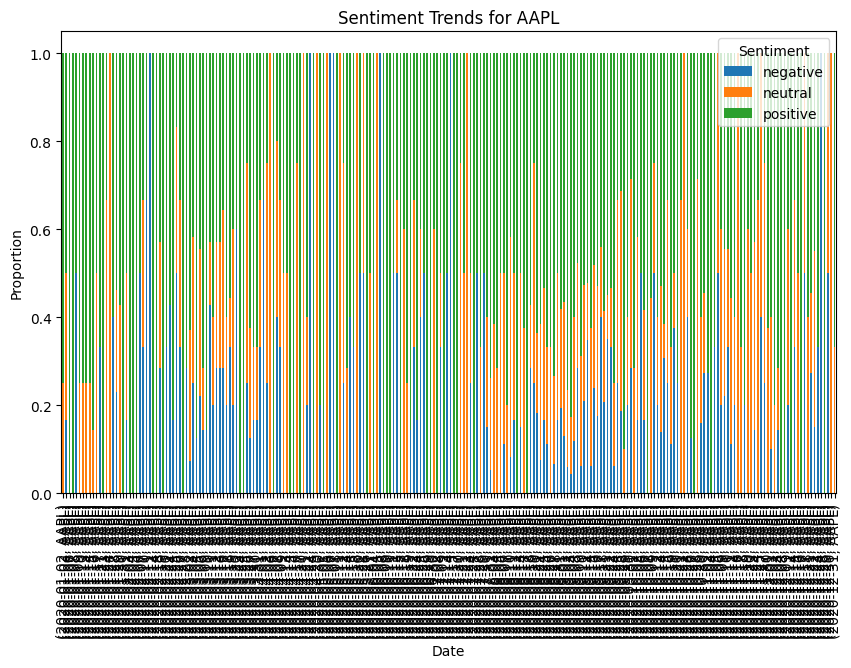

In [ ]:
#Visualize sentiment proportions over time for a specific company
import matplotlib.pyplot as plt

company_sentiment = sentiment_summary.loc[(slice(None), 'AAPL'), :]
company_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Trends for AAPL')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.show()
